# S&P 500 PREDICTIVE ANALYSIS - QAILA CASANDRA
Proyek ini merupakan proyek pertama Machine Learning Terapan
## Dataset
adapun dataset yang digunakan pada proyek ini berasal dari [S&P 500](https://finance.yahoo.com/quote/%5EGSPC/history/?period1=1704067200&period2=1750792512&guccounter=1)

## Library

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib_inline

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict
from sklearn.impute import SimpleImputer

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

### Read Dataset

In [3]:
path = 'DataS&P500.csv'
df = pd.read_csv (path)
df.head(10)

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,24/06/2025,"6.092,18","6.061,21","6.101,76","6.059,25",NaN,"1,11%"
1,23/06/2025,"6.025,17","5.969,67","6.028,77","5.943,23",NaN,"0,96%"
2,20/06/2025,"5.967,84","5.999,67","6.018,20","5.952,56",NaN,"-0,22%"
3,18/06/2025,"5.980,87","5.987,93","6.018,25","5.971,89",NaN,"-0,03%"
4,17/06/2025,"5.982,72","6.012,15","6.023,25","5.974,80",NaN,"-0,84%"
5,16/06/2025,"6.033,11","6.004,00","6.050,83","6.004,00",NaN,"0,94%"
6,13/06/2025,"5.976,97","6.000,56","6.026,16","5.963,21",NaN,"-1,13%"
7,12/06/2025,"6.045,26","6.009,90","6.045,43","6.003,88",NaN,"0,38%"
8,11/06/2025,"6.022,24","6.049,38","6.059,40","6.002,32",NaN,"-0,27%"
9,10/06/2025,"6.038,81","6.009,91","6.043,01","6.000,28",NaN,"0,55%"


In [4]:
print (f'data memiliki {df.shape[0]} records dan {df.shape[1]} kolom')

data memiliki 1276 records dan 7 kolom


## Explor Data Analisis
Pada daatset ini diketahui memiliki 1276 baris data dan 7 kolom, adapun kolom pada dataset [ini](DataS&P500.csv) adalah sebagai berikut


1. Tanggal  : Tanggal transaksi pasar S&P 500 berlangsung
2. Terakhir : Harga penutupan indeks S&P 500 di akhir hari perdagangan
3. Pembukaan: Harga indeks S&P 500 saat pasar dibuka
4. Tertinggi: Harga tertinggi indeks dalam hari tersebut
5. Terendah : Harga terendah indeks dalam hari tersebut
6. Vol      : Volume transaksi pada hari perdagangan
7. Perubahan: Presentase perubahan harga penurupan dibandingkan dengan hari sebelumnya

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     1276 non-null   object 
 1   Terakhir    1276 non-null   object 
 2   Pembukaan   1276 non-null   object 
 3   Tertinggi   1276 non-null   object 
 4   Terendah    1276 non-null   object 
 5   Vol.        0 non-null      float64
 6   Perubahan%  1276 non-null   object 
dtypes: float64(1), object(6)
memory usage: 69.9+ KB


In [6]:
df.isna().sum()

Tanggal          0
Terakhir         0
Pembukaan        0
Tertinggi        0
Terendah         0
Vol.          1276
Perubahan%       0
dtype: int64

berdasarkan hasil output tersebut, dapat dilihat bahwa masih terdapat kolom yang memiliki missing value, yaitu kolom Vol dengan banyaknya missing value sebanyak 1276. Untuk mengisi kekosongan pada kolom Vol, maka akan diisi dengan 0

In [7]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
df[['Vol.']] = imputer.fit_transform(df[['Vol.']])

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:574: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


In [8]:
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,24/06/2025,"6.092,18","6.061,21","6.101,76","6.059,25",0.0,"1,11%"
1,23/06/2025,"6.025,17","5.969,67","6.028,77","5.943,23",0.0,"0,96%"
2,20/06/2025,"5.967,84","5.999,67","6.018,20","5.952,56",0.0,"-0,22%"
3,18/06/2025,"5.980,87","5.987,93","6.018,25","5.971,89",0.0,"-0,03%"
4,17/06/2025,"5.982,72","6.012,15","6.023,25","5.974,80",0.0,"-0,84%"


selanjutnya saya memastikan tidak adanya missing value

In [9]:
print('Total missing value in the dataframe:', df.isnull().sum().sum(), 'records')

Total missing value in the dataframe: 0 records


## Eksplorasi Data Statistik
Pada umumnya dalam sebuah data memiliki informasi statistik, pada tahap ini adalah untuk menampilkan statistik ringkasan dari seluruh kolom baik numerik maupun non-numerik, adapun penjelaasan dari masing - masing kolom adalah sebagai berikut

•	Count	: Jumlah baris non-NaN (tidak kosong) dalam kolom tersebut

•	Unique	: Jumlah nilai unik dalam kolom (hanya untuk tipe objek/kategori)

•	Top	: Nilai yang paling sering muncul (modus)

•	Freq	: Frekuensi kemunculan nilai top

•	Mean	: Rata-rata (hanya untuk data numerik)

•	Std	: Standar deviasi (ukuran sebaran data)

•	Min	: Nilai terkecil (hanya untuk numerik)

•	25%	: Kuartil pertama (Q1) — 25% dari data berada di bawah nilai ini

•	50%	: Median — nilai tengah (Q2)

•	75%	: Kuartil ketiga (Q3) — 75% dari data berada di bawah nilai ini

•	Max	: Nilai maksimum

In [10]:
df.describe(include='all')

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
count,1276,1276,1276,1276,1276,1276.0,1276
unique,1276,1269,1269,1265,1266,NaN,422
top,27/05/2020,"4.137,64","4.354,17","4.511,99","5.560,95",NaN,"0,16%"
freq,1,2,2,2,2,NaN,12
mean,NaN,NaN,NaN,NaN,NaN,0.0,NaN
std,NaN,NaN,NaN,NaN,NaN,0.0,NaN
min,NaN,NaN,NaN,NaN,NaN,0.0,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.0,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.0,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.0,NaN


### Visualisasi Data
Langkah pertama yang saya lakukakukan adalah mencari outlier dengan menggunakan fungsi boxplot dari libraray seaborn

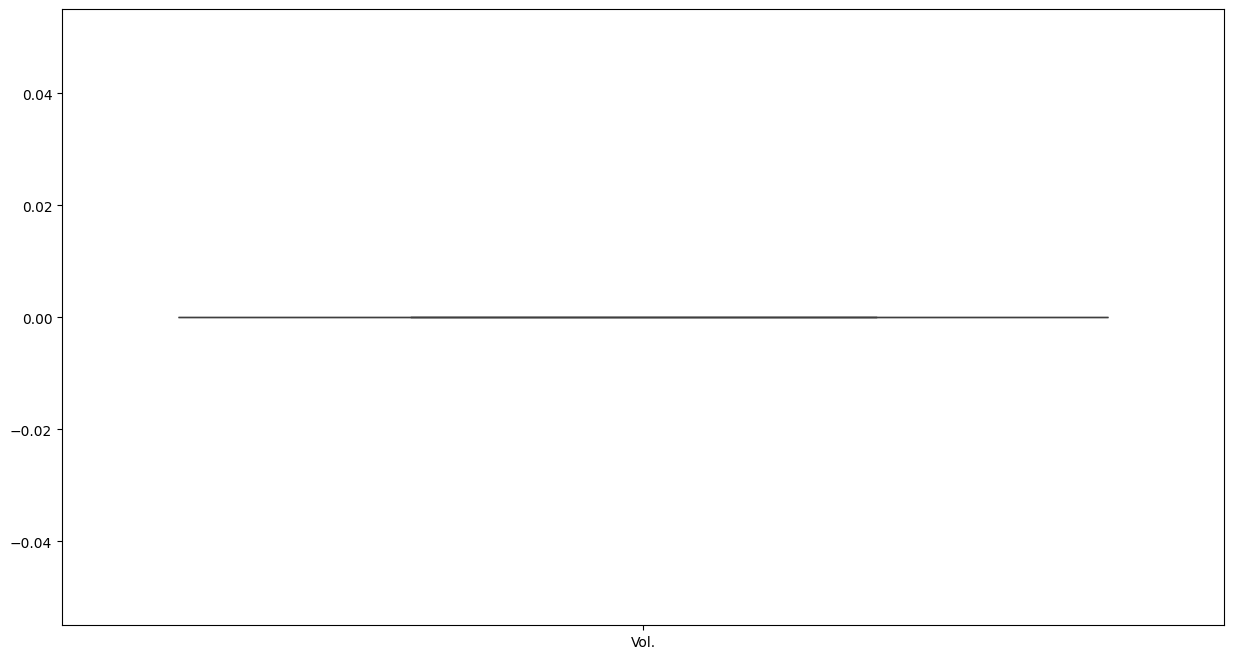

In [11]:
numerical_df = df.select_dtypes(include='float64')
plt.figure(figsize=(15,8))
sns.boxplot(data=numerical_df)
plt.show()

pada output boxplot, dapat kita lihat terjadi kesalahan, yaitu pada tipe data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     1276 non-null   object 
 1   Terakhir    1276 non-null   object 
 2   Pembukaan   1276 non-null   object 
 3   Tertinggi   1276 non-null   object 
 4   Terendah    1276 non-null   object 
 5   Vol.        1276 non-null   float64
 6   Perubahan%  1276 non-null   object 
dtypes: float64(1), object(6)
memory usage: 69.9+ KB


dapat dilihat bahwa tipe data adalah object, sehingga langkah selanjutnya adalah mengubah tipe data menjadi numerik

In [24]:
df = df.copy()
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True, errors='coerce')
numeric_cols = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Perubahan%']

for col in numeric_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace('.', '', regex=False)  # hapus titik ribuan
    df[col] = df[col].str.replace(',', '.', regex=False)  # ganti koma ke titik desimal
    df[col] = pd.to_numeric(df_cleaned[col], errors='coerce')     # ubah ke float, salah jadi NaN

print(df.dtypes)
print(df.head())


Tanggal       datetime64[ns]
Terakhir             float64
Pembukaan            float64
Tertinggi            float64
Terendah             float64
Vol.                 float64
Perubahan%           float64
dtype: object
     Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah  Vol.  Perubahan%
0 2025-06-24   6092.18    6061.21    6101.76   6059.25   0.0         NaN
1 2025-06-23   6025.17    5969.67    6028.77   5943.23   0.0         NaN
2 2025-06-20   5967.84    5999.67    6018.20   5952.56   0.0         NaN
3 2025-06-18   5980.87    5987.93    6018.25   5971.89   0.0         NaN
4 2025-06-17   5982.72    6012.15    6023.25   5974.80   0.0         NaN


selanjutnya kembali melakukan visualisasi

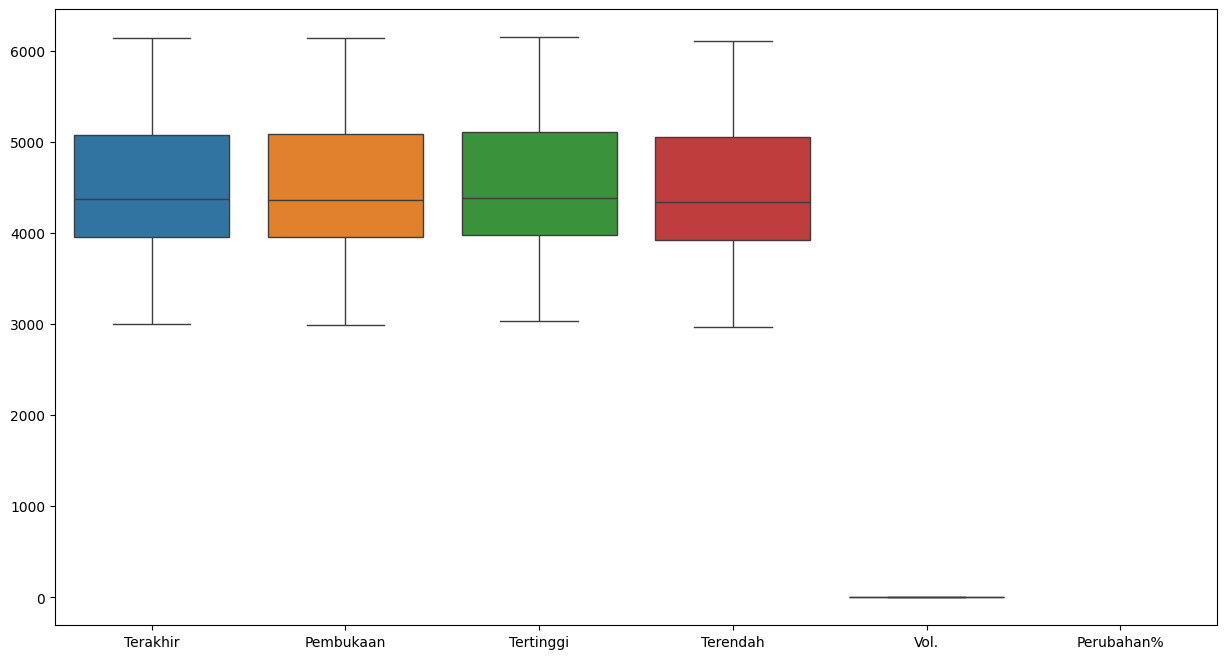

In [25]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numerical_col])
plt.show()

terlihat jelas bahwa pada kolom perubahan% memiliki outlier, untuk mengatasi hal tersebut maka akan digunakan teknik IQR method yaitu menghapus data yang berada diluar IQR

In [26]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
bottom = Q1 - 1.5 * IQR
top = Q3 + 1.5 * IQR
df = df[~((df < bottom) | (df > top)).any(axis=1)]
df.head()

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2025-06-24,6092.18,6061.21,6101.76,6059.25,0.0,NaN
1,2025-06-23,6025.17,5969.67,6028.77,5943.23,0.0,NaN
2,2025-06-20,5967.84,5999.67,6018.20,5952.56,0.0,NaN
3,2025-06-18,5980.87,5987.93,6018.25,5971.89,0.0,NaN
4,2025-06-17,5982.72,6012.15,6023.25,5974.80,0.0,NaN


In [27]:
print(f'Data memiliki {df.shape[0]} records dan {df.shape[1]} kolom.')

Data memiliki 1276 records dan 7 kolom.


## Univariate Analysis

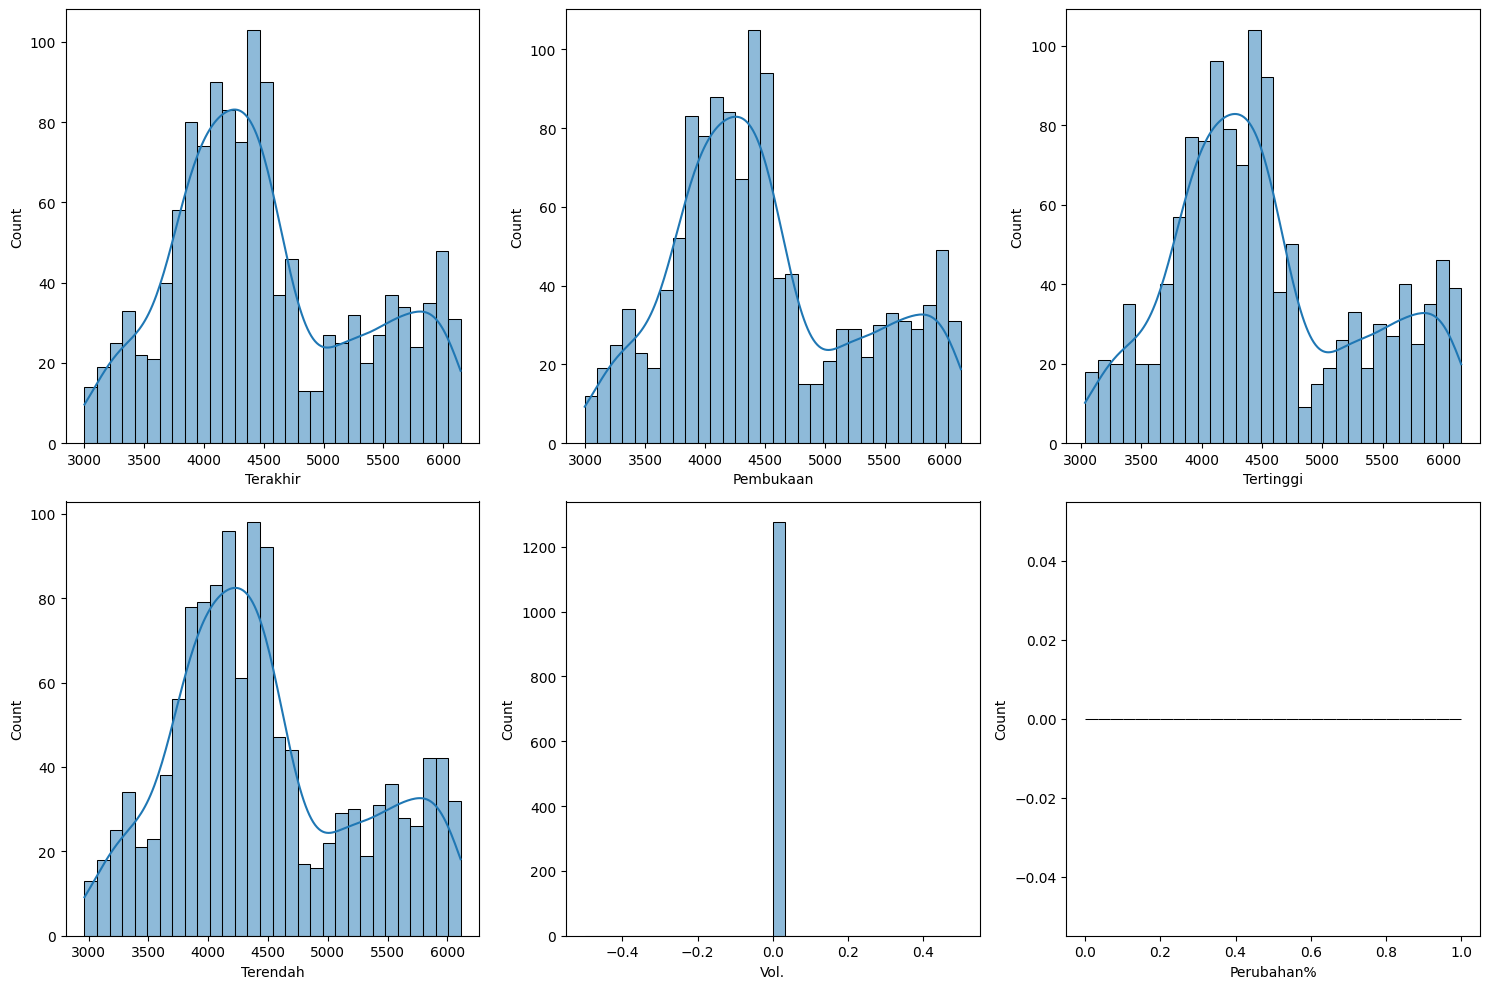

In [28]:
cols = 3
rows = 2
fig = plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col):
  ax = fig.add_subplot(rows, cols, i + 1)
  sns.histplot(x=df[col], bins=30, kde=True, ax=ax)
fig.tight_layout()
plt.show()

dikarenakan kita akan melakukan prediksi, maka fitur yang akan fokuskan adalah "Terakhir"

## Multivariate Analysis
Pada tahap ini adalah menganalisis korelasi anatar fitur "Terakhir" dengan fitur lainnya

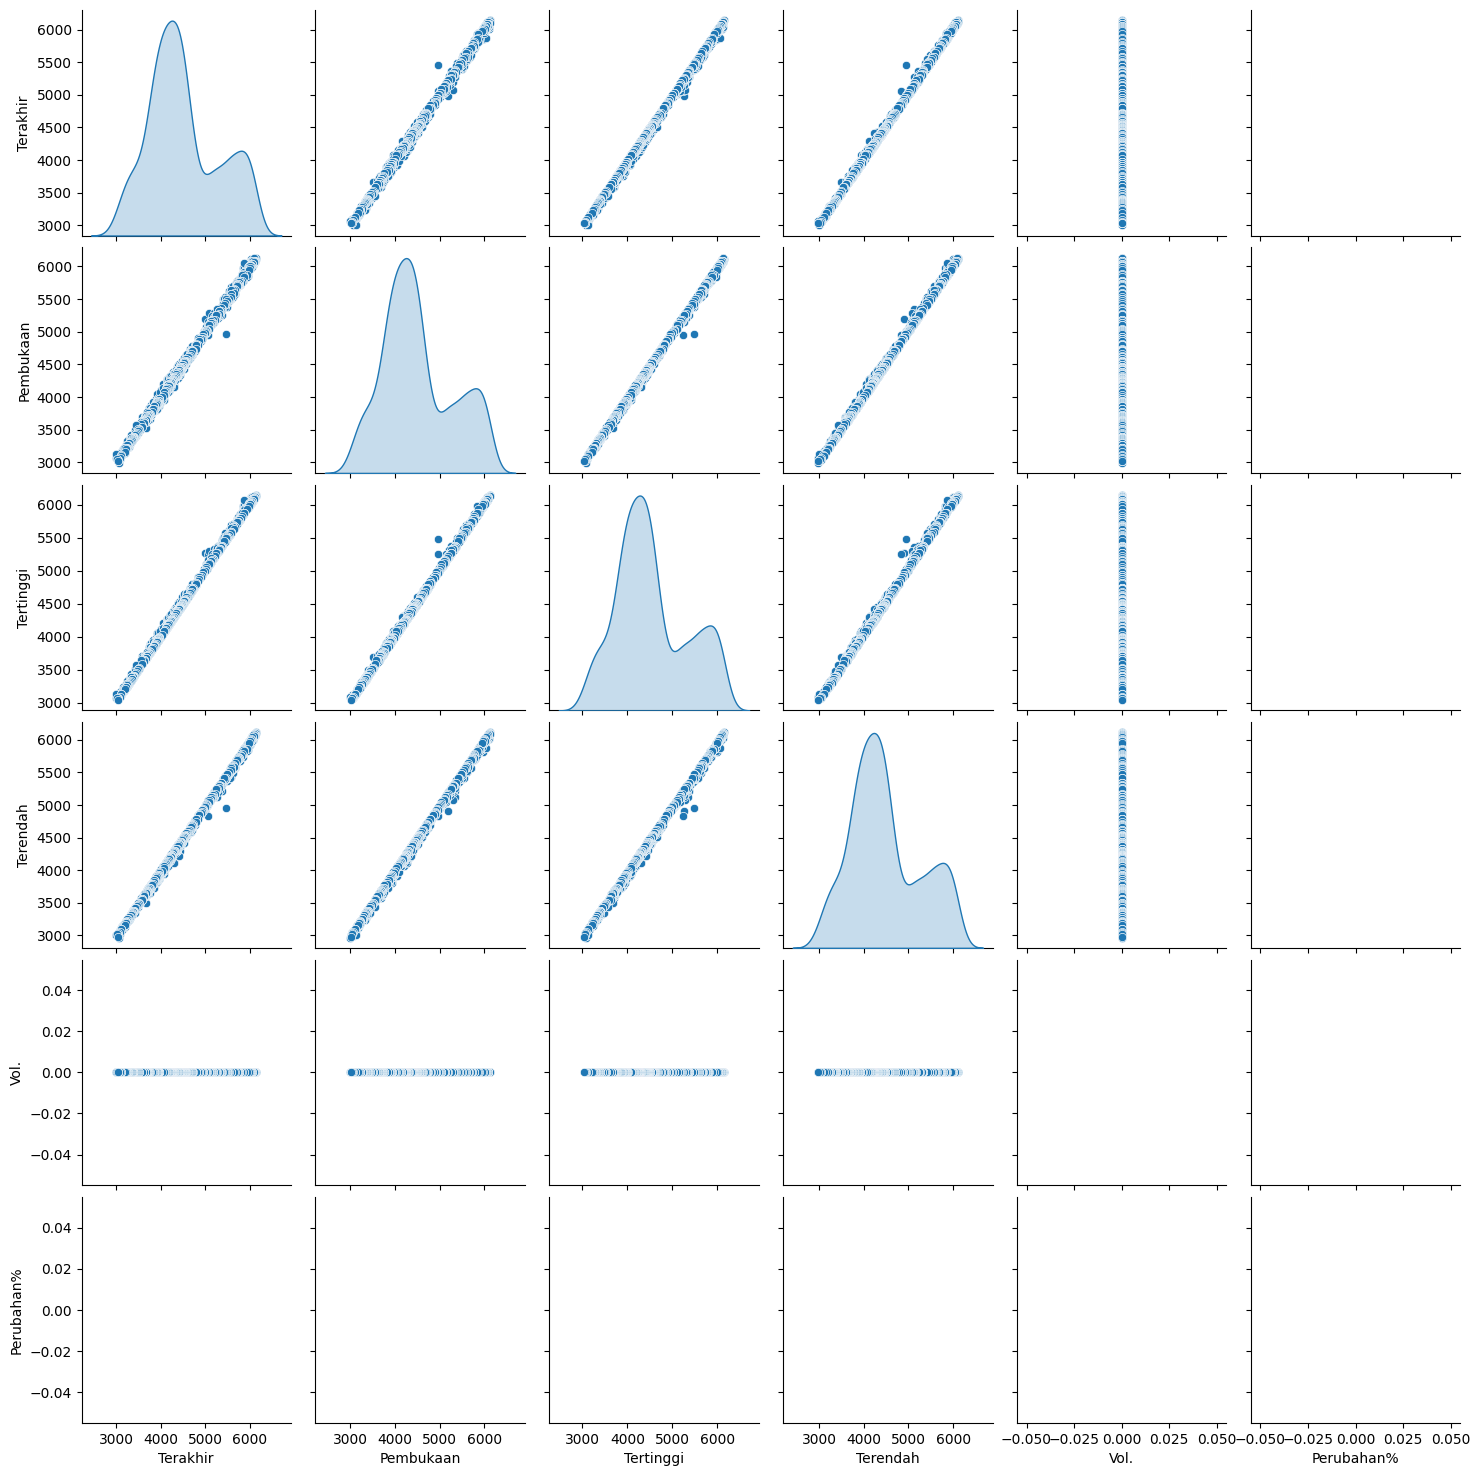

In [29]:
sns.pairplot(df[numerical_col], diag_kind='kde')
plt.show()

Dari hasil pairplot tersebut dapat dilihat bahwa fitur Terakhir, Pembukaan, Tertinggi dan Terendah menunjukan titik - titik membentuk garis diagonal lurus, sehingga fitur - fitur tersebut saling berkorelasi sangat tinggi

untuk melihat korelasi lebih jelas, maka saya menggunakan heatmap

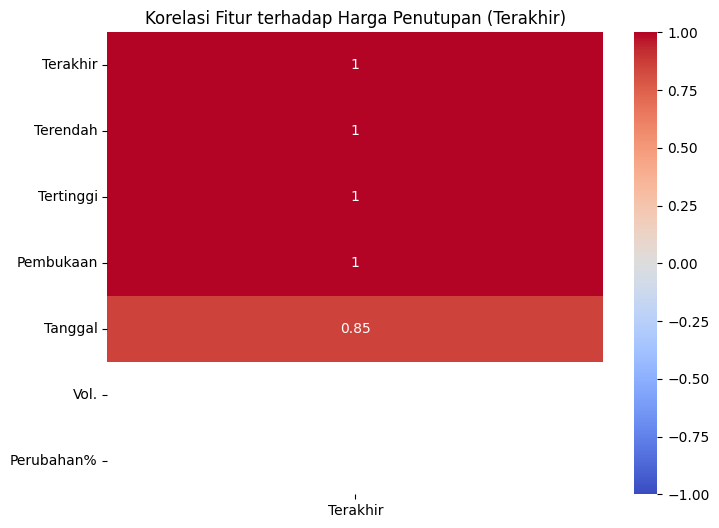

In [30]:
correlation_matrix = df.corr()
cor_target = correlation_matrix[["Terakhir"]].sort_values(by="Terakhir", ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(cor_target, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasi Fitur terhadap Harga Penutupan (Terakhir)")
plt.show()

Dari heatmap dapat dilihat bahwa Terendah, Tertinggi dan Pembukaan berkorelasi sangat tinggi dengan harga penutupan. Sedangkan Tanggal berkorelasi cukup tinggi. Namun pada kolom Vol dan Perubahan% dinyatakan tidak valid

## Data Preparation
Selanjutnya adalah menghapus kolom 'Tanggal', 'Volume' dan 'Perubahan%' sebelum melakukan training, hal ini perlu dilakukan karena kemungkinan data tersebut akan mengganggu model dalam proses training

In [31]:
df = df.drop(['Tanggal', 'Vol.', 'Perubahan%'], axis=1)
df.head()

,Terakhir,Pembukaan,Tertinggi,Terendah
0,6092.18,6061.21,6101.76,6059.25
1,6025.17,5969.67,6028.77,5943.23
2,5967.84,5999.67,6018.20,5952.56
3,5980.87,5987.93,6018.25,5971.89
4,5982.72,6012.15,6023.25,5974.80


### Splitting Dataset

In [32]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [33]:
print('Total X_train:', len(X_train), 'records')
print('Total y_train:', len(y_train), 'records')
print('Total X_test:', len(X_test), 'records')
print('Total y_test:', len(y_test), 'records')

Total X_train: 1020 records
Total y_train: 1020 records
Total X_test: 256 records
Total y_test: 256 records


### Normalisasi Data
untuk melakukan normalisasi data, saya akan menggunakan library MinMaxScaler. Tujuan dari normalisasi ini adalah agar model dapat lebih cepat dalam mempelajari data

In [34]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'], index=['KNN'])

## Modelling
### Hyperparameter Tuning
Hyperparameter tuning adalah proses untuk mencari kombinasi parameter terbaik dari sebuah model machine learning agar menghasilkan performa yang optimal. Pada kali ini saya hanya akan berfokus pada parameter KNN

In [39]:
def grid_search(model, hyperparameters):
  results = GridSearchCV(
      model,
      hyperparameters,
      cv=5,
      verbose=1,
      n_jobs=6
  )

  return results

In [40]:
knn = KNeighborsRegressor()
hyperparameters = {
    'n_neighbors': range(1, 10)
}

knn_search = grid_search(knn, hyperparameters)
knn_search.fit(X_train, y_train)
print(knn_search.best_params_)
print(knn_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 3}
0.9992230487012534


### Model Training

In [42]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Model Evaluation

In [43]:
model_dict = {'KNN': knn}
for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_train, model.predict(X_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_test, model.predict(X_test))
models = models.loc[['KNN']]
models.head()

,train_mse,test_mse
KNN,213.127951,891.692606


<Axes: >

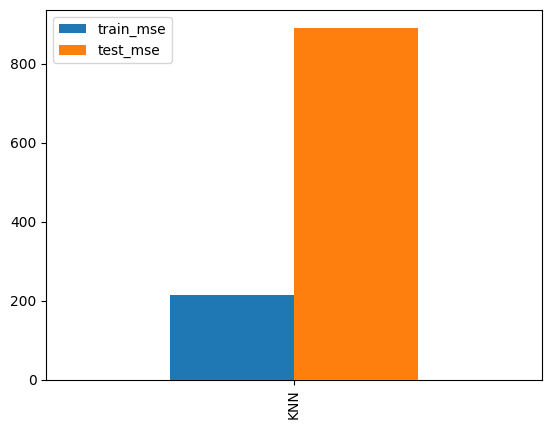

In [44]:
models.sort_values(by='test_mse', ascending=False).plot(kind='bar', zorder=3)